In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.svm import SVR 

import seaborn as sns

In [2]:
df_single_story = pd.read_csv('./single_story_cleaned_3.csv')

In [3]:
df_single_story.head()

,Unnamed: 0,Unnamed: 0.1,Location,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio
0,0,0,35,12500000,4,2,1750.0,6.5,0.988910,437.500000,2.000000
1,1,3,25,35000000,7,4,1700.0,15.0,0.416284,242.857143,1.750000
2,2,8,25,8900000,3,2,1380.0,6.0,0.844812,460.000000,1.500000
3,3,11,20,23000000,5,3,3500.0,20.0,0.642792,700.000000,1.666667
4,4,12,22,13000000,3,2,1800.0,10.0,0.661157,600.000000,1.500000


<h1>Use One Hot Encoding for location

In [4]:
pd.get_dummies(list(df_single_story['Location'])).shape

(2450, 40)

In [5]:
 df_single_story =pd.concat([df_single_story.drop(['Location'], axis=1), pd.get_dummies(list(df_single_story['Location']))], axis=1).drop(['Unnamed: 0.1'], axis=1)

In [6]:
df_single_story.head()

,Unnamed: 0,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio,0,...,30,31,32,33,34,35,36,37,38,39
0,0,12500000,4,2,1750.0,6.5,0.988910,437.500000,2.000000,0,...,0,0,0,0,0,1,0,0,0,0
1,1,35000000,7,4,1700.0,15.0,0.416284,242.857143,1.750000,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8900000,3,2,1380.0,6.0,0.844812,460.000000,1.500000,0,...,0,0,0,0,0,0,0,0,0,0
3,3,23000000,5,3,3500.0,20.0,0.642792,700.000000,1.666667,0,...,0,0,0,0,0,0,0,0,0,0
4,4,13000000,3,2,1800.0,10.0,0.661157,600.000000,1.500000,0,...,0,0,0,0,0,0,0,0,0,0


<h1>Try MLP without normalizing h_l_ratio, Bed size beds_bath_ratio

Iteration 1, loss = 171406264186703.00000000
Validation score: -2.931770
Iteration 2, loss = 170345657777340.15625000
Validation score: -2.866997
Iteration 3, loss = 163562927587314.09375000
Validation score: -2.554141
Iteration 4, loss = 140721954443432.59375000
Validation score: -1.727105
Iteration 5, loss = 95416239801815.68750000
Validation score: -0.576215
Iteration 6, loss = 52443853305441.57031250
Validation score: -0.153854
Iteration 7, loss = 41391723167278.92187500
Validation score: -0.211547
Iteration 8, loss = 41401989774991.89062500
Validation score: -0.199463
Iteration 9, loss = 41460329610817.00000000
Validation score: -0.193557
Iteration 10, loss = 41361780770878.64843750
Validation score: -0.194180
Iteration 11, loss = 41314268395171.18750000
Validation score: -0.190983
Iteration 12, loss = 41283458367175.43750000
Validation score: -0.188577
Iteration 13, loss = 41233111624293.03906250
Validation score: -0.199877
Iteration 14, loss = 41221503664871.02343750
Validation 

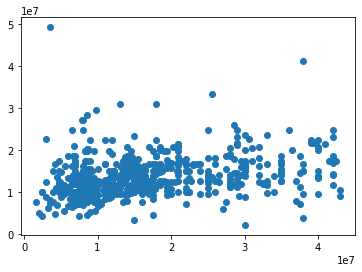

In [7]:
#   (100, 200, 100),
#   'relu',
#   'adam',
#   'invscaling',
#   ['Location', 'Beds', 'Baths', 'h_l_ratio', 'Bed Size', 'beds_bath_ratio']),
X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story.drop(['Price','Unnamed: 0', 'House Size', 'Land Size' ],axis=1),
    df_single_story['Price'],
    test_size=0.25,
    random_state=42)
model = MLPRegressor(
hidden_layer_sizes=(100, 200, 100), 
activation='relu', 
solver='adam', 
alpha=0.0001, 
batch_size=32, 
learning_rate='invscaling', 
learning_rate_init=0.001, 
power_t=0.5, 
momentum=0.9, 
verbose=1, 
early_stopping=True)                        
model.fit(X_train, Y_train)
score = model.score(X_train, Y_train)
y_p = model.predict(X_test)
rmse = np.sqrt(((y_p - Y_test) ** 2).mean())
fig, ax = plt.subplots()
ax.scatter(x=Y_test, y=y_p)

<h1>Try MLP with normalizing

In [8]:

df_single_story = df_single_story.drop(['Unnamed: 0'], axis=1)
df_single_story_scaled = df_single_story.copy()
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df_single_story[df_single_story.columns])
df_single_story_scaled[df_single_story.columns] = min_max_scaler.transform(df_single_story[df_single_story.columns])

In [9]:
df_single_story_scaled.head(20)

,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio,0,1,...,30,31,32,33,34,35,36,37,38,39
0,0.257611,0.333333,0.111111,0.307060,0.027638,0.988378,0.152397,0.272727,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.784543,0.666667,0.333333,0.297317,0.070352,0.388194,0.072407,0.227273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.173302,0.222222,0.111111,0.234960,0.025126,0.837345,0.161644,0.181818,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.503513,0.444444,0.222222,0.648074,0.095477,0.625603,0.260274,0.212121,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.269321,0.222222,0.111111,0.316804,0.045226,0.644852,0.219178,0.181818,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.281030,0.333333,0.111111,0.355777,0.036181,0.890868,0.178082,0.272727,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.163934,0.333333,0.111111,0.453209,0.045226,0.914342,0.229452,0.272727,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.266979,0.222222,0.111111,0.287574,0.045226,0.587104,0.198630,0.181818,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.526932,0.333333,0.222222,0.394750,0.090452,0.397650,0.198630,0.151515,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.117096,0.111111,0.111111,0.160912,0.023116,0.639352,0.178082,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:

arr = np.zeros(48,dtype=float) 
arr[0] = 0.1255524753198137
mn =MinMaxScaler().fit(df_single_story['Price'].values.reshape(-1,1))
mn.inverse_transform(np.array([0.1255524753198137]).reshape(1,1))

array([[6861090.69615605]])

Iteration 1, loss = 0.01790356
Validation score: 0.614757
Iteration 2, loss = 0.00965794
Validation score: 0.668046
Iteration 3, loss = 0.00878378
Validation score: 0.686415
Iteration 4, loss = 0.00822458
Validation score: 0.678338
Iteration 5, loss = 0.00794931
Validation score: 0.673642
Iteration 6, loss = 0.00751861
Validation score: 0.713362
Iteration 7, loss = 0.00770413
Validation score: 0.694078
Iteration 8, loss = 0.00738163
Validation score: 0.665243
Iteration 9, loss = 0.00710863
Validation score: 0.710302
Iteration 10, loss = 0.00694181
Validation score: 0.711455
Iteration 11, loss = 0.00696485
Validation score: 0.667563
Iteration 12, loss = 0.00675499
Validation score: 0.700135
Iteration 13, loss = 0.00708892
Validation score: 0.691005
Iteration 14, loss = 0.00639605
Validation score: 0.724747
Iteration 15, loss = 0.00672669
Validation score: 0.698896
Iteration 16, loss = 0.00647737
Validation score: 0.704779
Iteration 17, loss = 0.00680876
Validation score: 0.702464
Iterat

Text(0.5, 1.0, 'Comparision Prediction vs Actual House Prices rmse: 0.12737840351808427 r2:0.7728287404747463')

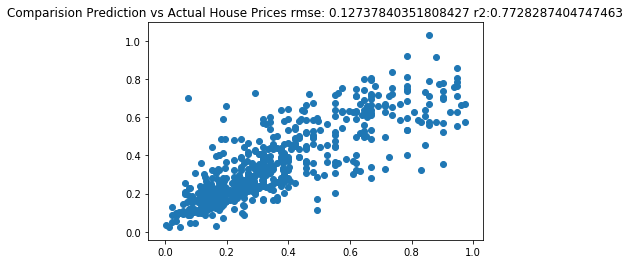

In [11]:
#   (100, 200, 100),
#   'relu',
#   'adam',
#   'invscaling',
#   ['Location', 'Beds', 'Baths', 'h_l_ratio', 'Bed Size', 'beds_bath_ratio']),
X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story_scaled.drop(['Price', 'Land Size' ],axis=1),
    df_single_story_scaled['Price'],
    test_size=0.25,
    random_state=42)
model = MLPRegressor(
hidden_layer_sizes=(100, 200, 100), 
activation='relu', 
solver='adam', 
alpha=0.0001, 
batch_size=32, 
learning_rate='invscaling', 
learning_rate_init=0.001, 
power_t=0.5, 
momentum=0.9, 
verbose=1, 
early_stopping=True)                        
model.fit(X_train, Y_train)
score = model.score(X_train, Y_train)
y_p = model.predict(X_test)
rmse = np.sqrt(((y_p - Y_test) ** 2).mean())
fig, ax = plt.subplots()
ax.scatter(x=Y_test, y=y_p)
ax.set_title('Comparision Prediction vs Actual House Prices rmse: ' + str(rmse) + " r2:" + str(score))

In [14]:
df_single_story_scaled.head(1)

,Price,Beds,Baths,House Size,Land Size,h_l_ratio,Bed Size,beds_bath_ratio,0,1,...,30,31,32,33,34,35,36,37,38,39
0,0.257611,0.333333,0.111111,0.30706,0.027638,0.988378,0.152397,0.272727,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Iteration 1, loss = 0.04185211
Validation score: 0.363622
Iteration 2, loss = 0.01363771
Validation score: 0.470119
Iteration 3, loss = 0.01059229
Validation score: 0.477349
Iteration 4, loss = 0.00982640
Validation score: 0.489247
Iteration 5, loss = 0.00884869
Validation score: 0.472026
Iteration 6, loss = 0.00851639
Validation score: 0.495001
Iteration 7, loss = 0.00812098
Validation score: 0.498057
Iteration 8, loss = 0.00798339
Validation score: 0.501188
Iteration 9, loss = 0.00737891
Validation score: 0.510242
Iteration 10, loss = 0.00747232
Validation score: 0.456405
Iteration 11, loss = 0.00732550
Validation score: 0.514025
Iteration 12, loss = 0.00704512
Validation score: 0.530955
Iteration 13, loss = 0.00691996
Validation score: 0.539567
Iteration 14, loss = 0.00667654
Validation score: 0.530767
Iteration 15, loss = 0.00670236
Validation score: 0.542749
Iteration 16, loss = 0.00669624
Validation score: 0.507719
Iteration 17, loss = 0.00640078
Validation score: 0.522803
Iterat

Text(0.5, 1.0, 'Comparision Prediction vs Actual House Prices rmse: 0.12675609825532017 r2:0.7230923742939424')

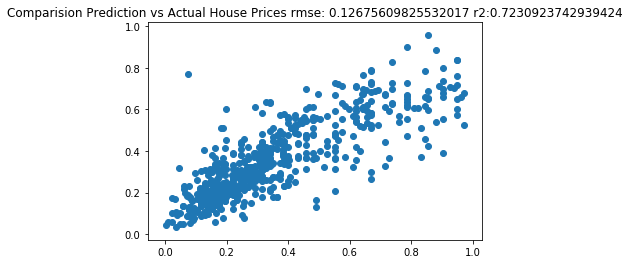

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_single_story_scaled.drop(['Price', 'House Size', 'Land Size' ],axis=1),
    df_single_story_scaled['Price'],
    test_size=0.25,
    random_state=42)
model = MLPRegressor(
hidden_layer_sizes=(100, 200, 100), 
activation='relu', 
solver='adam', 
alpha=0.0001, 
batch_size=32, 
learning_rate='invscaling', 
learning_rate_init=0.001, 
power_t=0.5, 
momentum=0.9, 
verbose=1, 
early_stopping=True)                        
model.fit(X_train, Y_train)
score = model.score(X_train, Y_train)
y_p = model.predict(X_test)
rmse = np.sqrt(((y_p - Y_test) ** 2).mean())
fig, ax = plt.subplots()
ax.scatter(x=Y_test, y=y_p)
ax.set_title('Comparision Prediction vs Actual House Prices rmse: ' + str(rmse) + " r2:" + str(score))

In [ ]:
df_single_story.head()

<h1>Try with Random Forest

In [16]:
features_important =[
    ['Location', 'Beds', 'Baths', 'Land Size', ],
    ['Location', 'Beds', 'Baths','House Size', 'h_l_ratio'],
    ['Location', 'Beds', 'Baths', 'Land Size', 'h_l_ratio'],
    ['Location', 'Beds', 'Baths', 'Land Size', 'Bed Size'],
    ['Location', 'Beds', 'House Size', 'Land Size', 'beds_bath_ratio'],
    ['Location', 'Beds', 'House Size', 'h_l_ratio', 'beds_bath_ratio'],
    ['Location', 'Beds', 'Land Size', 'h_l_ratio', 'beds_bath_ratio'],
    ['Location', 'Beds', 'Baths', 'House Size', 'h_l_ratio', 'beds_bath_ratio'],
    ['Location', 'Beds', 'Baths', 'Land Size', 'h_l_ratio', 'beds_bath_ratio'],
    ['Location', 'Beds', 'Baths', 'h_l_ratio', 'Bed Size', 'beds_bath_ratio']  
]

In [17]:
rf_results = []
for index, features in enumerate(features_important):
    model = RandomForestRegressor(n_jobs=-1)
    max_scores_param = []
    X_train, X_test, Y_train, Y_test = train_test_split(
        df_single_story[features],
        df_single_story['Price'],
        test_size=0.25,
        random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmse ))
#     print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
    print('#######################################################################################################################')
#     print(features)
#     print(max_scores_param)
    rf_results.append((features, max_scores_param))
    print('#######################################################################################################################')


KeyError: "['Location'] not in index"

In [ ]:
rf_results

In [18]:
features_important =[
    ['Beds', 'Baths', 'Land Size',1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39 ],
    [ 'Beds', 'Baths','House Size', 'h_l_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    [ 'Beds', 'Baths', 'Land Size', 'h_l_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    [ 'Beds', 'Baths', 'Land Size', 'Bed Size', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    [ 'Beds', 'House Size', 'Land Size', 'beds_bath_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    [ 'Beds', 'House Size', 'h_l_ratio', 'beds_bath_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    [ 'Beds', 'Land Size', 'h_l_ratio', 'beds_bath_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    [ 'Beds', 'Baths', 'House Size', 'h_l_ratio', 'beds_bath_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    [ 'Beds', 'Baths', 'Land Size', 'h_l_ratio', 'beds_bath_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    [ 'Beds', 'Baths', 'h_l_ratio', 'Bed Size', 'beds_bath_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]  
]

In [19]:
rf_results = []
for index, features in enumerate(features_important):
    model = RandomForestRegressor(n_jobs=-1)
    max_scores_param = []
    X_train, X_test, Y_train, Y_test = train_test_split(
        df_single_story[features],
        df_single_story['Price'],
        test_size=0.25,
        random_state=42
    )
    estimators = np.arange(10, 400, 10)
    scores = []
    rmse = 0.0
    rmses = []
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, Y_train)
        pred_y = model.predict(X_test)
        rmse = np.sqrt(((pred_y - Y_test) ** 2).mean())
        scores.append(model.score(X_test, Y_test))
        rmses.append(rmse)
    max_scores_param.append((max(scores), estimators[scores.index(max(scores))], rmses[scores.index(max(scores))] ))
#     print(max_scores_param)
# ax.legend([
#     'cluser1' + 'max_score: '+ str(max_scores_param [0][0])  + ' n_estimator: ' + str(max_scores_param [0][1]) + ' rmse: ' + str(max_scores_param [0][2]),
#     'cluster2' + 'max_score: '+ str(max_scores_param [1][0])  + ' n_estimator: ' + str(max_scores_param [1][1]) + ' rmse: ' + str(max_scores_param [1][2])
# #     'cluster3' + 'max_score: '+ str(max_scores_param [2][0])  + ' n_estimator: ' + str(max_scores_param [2][1]) + ' rmse: ' + str(max_scores_param [2][2])
# #     'cluster4' + 'max_score: '+ str(max_scores_param [3][0])  + ' n_estimator: ' + str(max_scores_param [3][1]) + ' rmse: ' + str(max_scores_param [3][2]),
# ])
#     print(features)
#     print(max_scores_param)
    rf_results.append((features, max_scores_param))
    print('#######################################################################################################################')


#######################################################################################################################
#######################################################################################################################
#######################################################################################################################
#######################################################################################################################
#######################################################################################################################
#######################################################################################################################
#######################################################################################################################
#######################################################################################################################
########################################

In [20]:
rf_results[0][1][0][0]

0.6244132054371782

In [21]:
for i, t in enumerate(rf_results):
    print('#############################################################################################################################')
    try:
        print(t[0])
        print(rf_results[i][1][0])
        print(rf_results[i][1][0][1])
    except IndexError:
        print()

#############################################################################################################################
['Beds', 'Baths', 'Land Size', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
(0.6244132054371782, 390, 5851150.730775493)
390
#############################################################################################################################
['Beds', 'Baths', 'House Size', 'h_l_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
(0.6304282729282549, 370, 5843998.267324475)
370
#############################################################################################################################
['Beds', 'Baths', 'Land Size', 'h_l_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,

In [22]:
print('works')

works


<h1>Try to tune parameters for RF

In [24]:
param_grid = { 
    'n_estimators': [20, 40, 50, 80,100, 120, 130, 150, 180, 200, 220, ],
    'max_features': [1, 2, 3, 4, 5, 6,8, 9,10,11,12,15,18,'auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 10,20,25],
    'criterion' :['mse', 'mae']
}

In [28]:
best_features = ['Beds', 'Baths', 'Land Size', 'h_l_ratio', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(
        df_single_story.drop(['Price'], axis=1),
        df_single_story['Price'],
        test_size=0.25,
        random_state=42
    )

In [30]:
grid_search = GridSearchCV(param_grid=param_grid, estimator=RandomForestRegressor(), cv=5)
grid_search.fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
print(grid_search)